In [ ]:
# # alternative way

# import pandas as pd
# import numpy as np
# import json
# import plotly.graph_objs as go
# # import numpy as np
# import matplotlib.pyplot as plt


# with open('shorter_sim.json') as fh:

#     data = json.load(fh)
# # fh = open('test.json')
# print(data)
# df = pd.json_normalize(data,)
# for x in data:
#     df = pd.json_normalize(data[x])

# df.explode(['timestamp','gps coordinates','oxygen','pulse','air_quality',
#             'humidity','temperature'
#             # 'distance'
#             ])

In [2]:
# create main dataset
import pandas as pd
import numpy as np
import json
import plotly_express as px
import plotly.graph_objs as go
# import numpy as np
import matplotlib.pyplot as plt

# longer simulation dataset
data = pd.read_json('longer_sim.json')
# shorter simulation dataset
# data = pd.read_json('shorter_sim.json')

df = data.transpose().explode(['timestamp','gps coordinates','oxygen','pulse','air_quality','humidity','temperature'
                            #    'distance'
                               ])
df['lat'], df['lon']= zip(*list(df['gps coordinates'].values))
df = df.astype({"timestamp": float,"lat": float, "lon": float,"pulse": float})
df = df.reset_index()
df.rename(columns={'index':'zebra'}, inplace=True)
df


zebra  timestamp        gps coordinates oxygen  pulse  \
0      Zebra:e46fff      61.98   [203.6385, -92.7404]   0.98   60.0   
1      Zebra:e46fff      62.98   [205.361, -93.26171]   0.98   60.0   
2      Zebra:e46fff      63.99  [207.1209, -93.65476]   0.98   60.0   
3      Zebra:e46fff      64.99  [208.8972, -93.95678]   0.98   60.0   
4      Zebra:e46fff      65.99  [210.6829, -94.19611]   0.98   60.0   
...             ...        ...                    ...    ...    ...   
17045  Zebra:381735    3552.27  [-265.3168, 154.4784]   0.98   60.0   
17046  Zebra:381735    3553.27  [-264.5526, 152.8466]   0.98   60.0   
17047  Zebra:381735    3554.27  [-263.7885, 151.2148]   0.98   60.0   
17048  Zebra:381735    3555.27   [-263.0243, 149.583]   0.98   60.0   
17049  Zebra:381735    3556.27  [-262.2602, 147.9513]   0.98   60.0   

      air_quality humidity temperature distance       lat        lon  
0               1        1           1       []  203.6385  -92.74040  
1               1        1           1       []  205.3610  -93.26171  
2               1        1           1       []  207.1209  -93.65476  
3               1        1           1       []  208.8972  -93.95678  
4               1        1           1       []  210.6829  -94.19611  
...           ...      ...         ...      ...       ...        ...  
17045           1        1           1       [] -265.3168  154.47840  
17046           1        1           1       [] -264.5526  152.84660  
17047           1        1           1       [] -263.7885  151.21480  
17048           1        1           1       [] -263.0243  149.58300  
17049           1        1           1       [] -262.2602  147.95130  

[17050 rows x 11 columns]

In [3]:
fig = px.scatter(df,title = 'x-y Positions of Zebras', x= 'lat', y='lon',color= 'zebra', hover_data='timestamp')

fig.update_layout(
    xaxis=dict(
        title=dict(
            text="Latitude"
        )
    ),
    yaxis=dict(
        title=dict(
            text="Longitude"
        )
    ),
    legend=dict(
        title=dict(
            text="Zebra Species"
        )
    )
    )

# fig.add_annotation(
#     x=df["lat"][0],
#     y=df["lon"][0],
#     ax=df["lat"][1],
#     ay=df["lon"][1],
#     xref="x",
#     yref="y",
#     axref="x",
#     ayref="y",
#     text="",
#     showarrow=True,
#     arrowhead=1,
#     arrowsize=1,
#     arrowwidth=2,
#     arrowcolor="black"
# )
fig.show()

In [ ]:
# calculate velocity on same dataframe (easier way in next cell)

# df['prev_lat'] = df.groupby(df.index)['lat'].shift(1)
# df['prev_lon'] = df.groupby(df.index)['lon'].shift(1)
# df['prev_timestamp'] = df.groupby(df.index)['timestamp'].shift(1)
# df['head'] = np.linalg.norm(df[['lat','lon']].values,axis=1)
# dist = df[['lat','lon','timestamp']].diff()




# df['dist'] = np.sqrt((df['lon']-df['prev_lon'])**2 + (df['lat']-df['prev_lat'])**2)
# df['vel'] = df['dist']/(df['timestamp']-df['prev_timestamp'])
# df




In [4]:
# calculate distance and velocity. assuming constant velocity because animals immediately jump to speeds

# df['dist'] = df[['timestamp','lat','lon']].diff().fillna(0)
df['time_delta'] = df['timestamp'].diff()
df['dist']=(np.sqrt(df['lat'].diff()**2 + df['lon'].diff()**2))
df['vel'] = df['dist']/df['time_delta']
df = df.fillna(0)
# df['accel'] = 2*(df['dist']-(df['vel'].shift(1)*df['time_delta']))/(df['time_delta']**2)
# df['accel_2'] = (df['vel'] - df['vel'].shift(1))/df['time_delta']
df

zebra  timestamp        gps coordinates oxygen  pulse  \
0      Zebra:e46fff      61.98   [203.6385, -92.7404]   0.98   60.0   
1      Zebra:e46fff      62.98   [205.361, -93.26171]   0.98   60.0   
2      Zebra:e46fff      63.99  [207.1209, -93.65476]   0.98   60.0   
3      Zebra:e46fff      64.99  [208.8972, -93.95678]   0.98   60.0   
4      Zebra:e46fff      65.99  [210.6829, -94.19611]   0.98   60.0   
...             ...        ...                    ...    ...    ...   
17045  Zebra:381735    3552.27  [-265.3168, 154.4784]   0.98   60.0   
17046  Zebra:381735    3553.27  [-264.5526, 152.8466]   0.98   60.0   
17047  Zebra:381735    3554.27  [-263.7885, 151.2148]   0.98   60.0   
17048  Zebra:381735    3555.27   [-263.0243, 149.583]   0.98   60.0   
17049  Zebra:381735    3556.27  [-262.2602, 147.9513]   0.98   60.0   

      air_quality humidity temperature distance       lat        lon  \
0               1        1           1       []  203.6385  -92.74040   
1               1        1           1       []  205.3610  -93.26171   
2               1        1           1       []  207.1209  -93.65476   
3               1        1           1       []  208.8972  -93.95678   
4               1        1           1       []  210.6829  -94.19611   
...           ...      ...         ...      ...       ...        ...   
17045           1        1           1       [] -265.3168  154.47840   
17046           1        1           1       [] -264.5526  152.84660   
17047           1        1           1       [] -263.7885  151.21480   
17048           1        1           1       [] -263.0243  149.58300   
17049           1        1           1       [] -262.2602  147.95130   

       time_delta      dist       vel  
0            0.00  0.000000  0.000000  
1            1.00  1.799658  1.799658  
2            1.01  1.803257  1.785403  
3            1.00  1.801793  1.801793  
4            1.00  1.801667  1.801667  
...           ...       ...       ...  
17045        1.00  1.801838  1.801838  
17046        1.00  1.801880  1.801880  
17047        1.00  1.801838  1.801838  
17048        1.00  1.801880  1.801880  
17049        1.00  1.801747  1.801747  

[17050 rows x 14 columns]

In [5]:
# avg velocity
avg_vel = df.groupby('zebra')['vel'].mean()
fig2 = px.bar(avg_vel,title = 'Average Velocities of Zebras', y='vel',color = avg_vel.index)
fig2.update_layout(
    xaxis=dict(
        title=dict(
            text="Zebra Species"
        )
    ),
    yaxis=dict(
        title=dict(
            text="avg. Velocity"
        )
    ),
    legend=dict(
        title=dict(
            text="Zebra Species"
        )
    ),

)
fig2.show()
avg_vel

zebra
Zebra:192694    2.768589
Zebra:349340    2.773456
Zebra:381735    2.751732
Zebra:99b29a    2.756093
Zebra:e46fff    2.741204
Name: vel, dtype: float64

In [6]:
# total distance travelled (summation of distance travelled in each timestep)
tot_dist = df.groupby('zebra')['dist'].sum()
fig3 = px.bar(tot_dist,title = 'Total Distance Travelled', y='dist',color = tot_dist.index)
fig3.update_layout(

    xaxis=dict(
        title=dict(
            text="Zebra Species"
        )
    ),
    yaxis=dict(
        title=dict(
            text="Distance"
        )
    ),
    legend=dict(
        title=dict(
            text="Zebra Species"
        )
    )
)
fig3.show()


In [7]:
# histogram
fig = px.histogram(df, title = 'Zebra Velocity histogram',x="vel", nbins=500)
fig.update_layout(

    xaxis=dict(
        title=dict(
            text="Velocity"
        )
    ),
    yaxis=dict(
        title=dict(
            text="Frequency"
        )
    )
    )
fig.show()

In [8]:
vel = df['vel'].values.tolist()

hist, bin_edges = np.histogram(vel, bins=20, density=True)
cdf = np.cumsum(hist * np.diff(bin_edges))
fig = go.Figure(data=[
    go.Bar(x=bin_edges, y=hist, name='Histogram'),
    go.Scatter(x=bin_edges, y=cdf, name='CDF')
])

fig.update_layout(
    title = dict(
        text = "Histogram w/ CDF overlay of Zebra Velocity"
        )
    ,
    xaxis=dict(
        title=dict(
            text="Velocity"
        )
    ),
    yaxis=dict(
        title=dict(
            text="Percentage"
        )
    )
    )
fig.show()

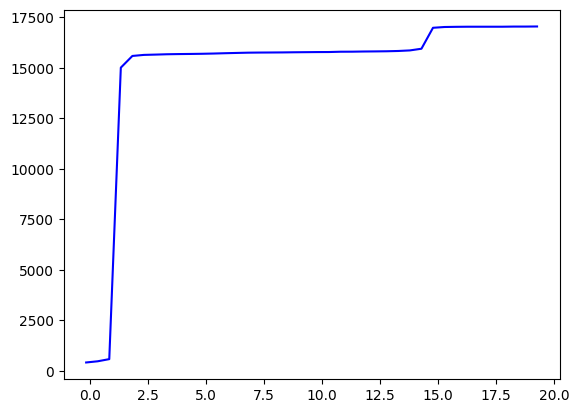

In [9]:

# evaluate the histogram
values, base = np.histogram(df['vel'], bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')

In [10]:
# pulse histogram
fig = px.line(df, title = 'Zebra Velocity histogram',x="timestamp",y= 'pulse', color = 'zebra')
fig.update_layout(

    xaxis=dict(
        title=dict(
            text="timestamp"
        )
    ),
    yaxis=dict(
        title=dict(
            text="Frequency"
        )
    )
    )
fig.show()

In [11]:
# Create animated scatter plot
fig = px.scatter(df, x="lat", y="lon", animation_frame="timestamp",
                 animation_group="zebra",
                   title="Zebra Position Timelapse",range_x=[-500,500], range_y=[-500,500],)
# fig.layout.updatemenus[0].buttons[0]['args'][1]['frame']['redraw'] = False
fig.show()